In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# data train, data test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape from 2D to 3D
X_train = X_train[:,:,:,None]
X_test = X_test[:,:,:,None]

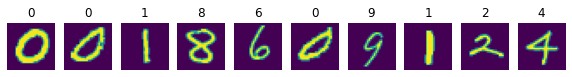

In [5]:
# Number to show 
n = 10

# Set how large of image
plt.figure(figsize=(10, 10))

# Show X_train
for index, number in enumerate(np.random.choice(X_train.shape[0], n)):
    plt.subplot(1, n, index+1)
    plt.imshow(X_train[number].reshape(28, 28))
    plt.title(y_train[number])
    plt.axis('off')

In [6]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
history = autoencoder.fit(X_train, X_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 27s 28ms/step - loss: 0.1764
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.1231
Epoch 3/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1144
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.1098
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.1069


In [8]:
# use Autoencoder to reconstruct
predict = autoencoder.predict(X_test)
# predict = autoencoder(X_test).numpy()

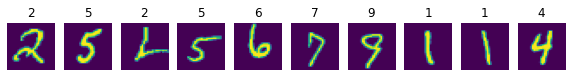

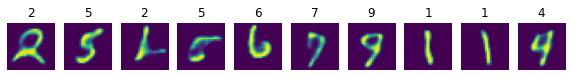

In [9]:
# Number to show
n = 10

# array of Number to show 
array_n = np.random.randint(1, len(X_test), n)

# Set how large of image
plt.figure(figsize=(10, 10))

# Show X_test
for index, number in enumerate(array_n):
    plt.subplot(1, n, index+1)
    plt.imshow(X_test[number].reshape(28, 28))
    plt.title(y_test[number])
    plt.axis('off')
    
# Set how large of image
plt.figure(figsize=(10, 10))

# Show Predict
for index, number in enumerate(array_n):
    plt.subplot(1, n, index+1)
    plt.imshow(predict[number].reshape(28, 28))
    plt.title(y_test[number])
    plt.axis('off')

plt.show()